In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
%matplotlib inline

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)

In [ ]:
train = pd.read_csv('/mnt/hdfs/sbrouil/mnist/train.csv')
test = pd.read_csv('/mnt/hdfs/sbrouil/mnist/test.csv')

In [196]:
X_train = train.iloc[:,1:].values
Y_train = train.iloc[:,0].values
X_test = test.iloc[:,1:].values

In [197]:
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/25+1
    n_cols=25
    plt.figure(figsize=(n_cols * 0.9, n_rows * 1.5))
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])

In [198]:
from sklearn.decomposition import PCA
n=10000
n_digits=10
X = X_train[0:n, :]
Y = Y_train[0:n]

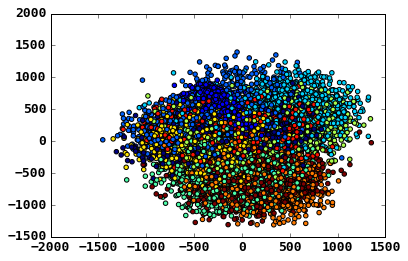

In [199]:
pca = PCA(n_components=n_digits)
X_pca = pca.fit(X).transform(X)

plt.figure()
plt.scatter(X_pca[:,2], X_pca[:,1], c=Y)

In [200]:
def plot_clusters(predict, y):
    purity = clusters_purity(predict, y)
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, matching %d, cluster size %s, purity %f " % (purity[i,0], purity[i,1], purity[i,2], purity[i,3])
        plot_ds(X_train[indices][:25], title, y[indices])
        
def clust_purity(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    class_guess = np.argmax(class_freq)
    n_good = class_freq[class_guess]
    n_all = np.sum(class_freq) 
    purity = n_good / n_all
    return (class_guess, n_good, n_all, purity)
    
def clusters_purity(predict, y):
    purity = np.zeros((10,4))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        purity[i,:] = clust_purity(cluster)
    return purity

## Clusterization with KMean (PCA component as centroids init)

Try to get 10 clusters with KMeans.

/opt/anaconda3/envs/python_3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/envs/python_3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


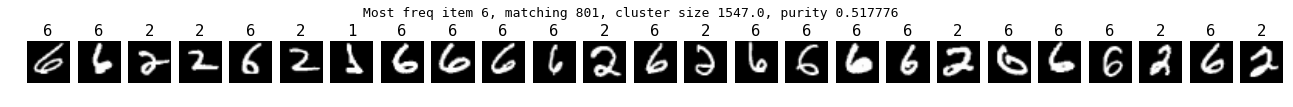

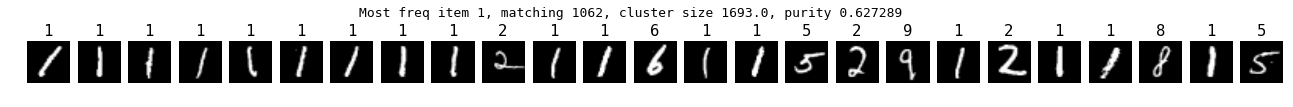

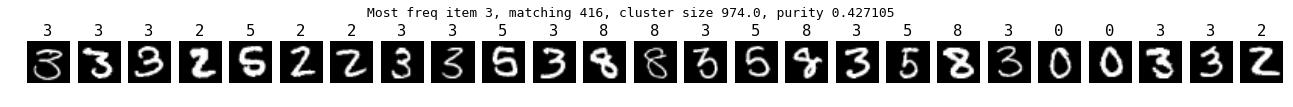

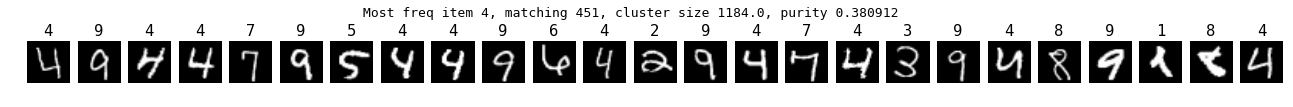

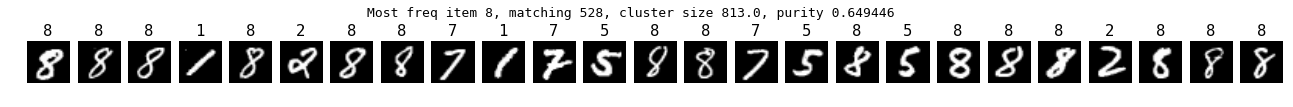

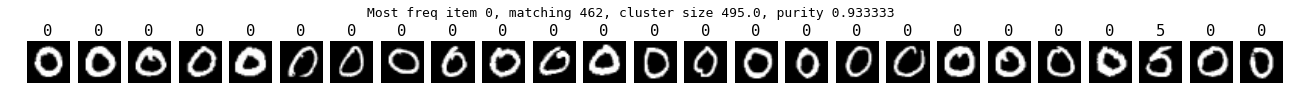

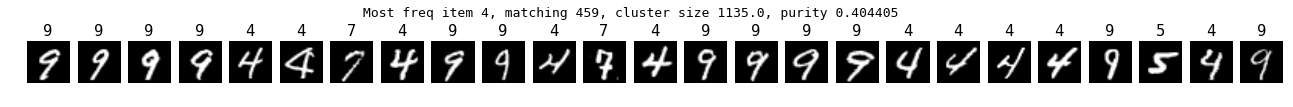

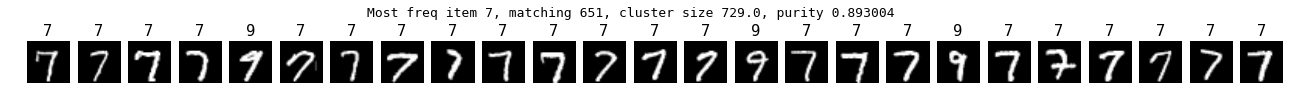

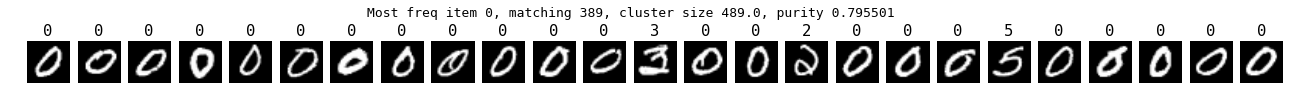

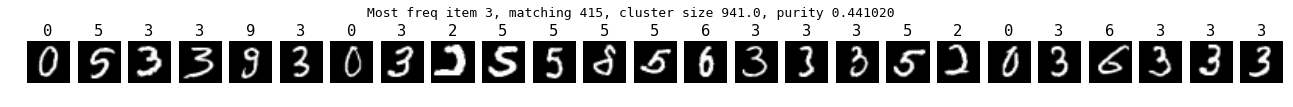

In [201]:
from sklearn.cluster import KMeans 

kmean = KMeans(n_clusters=n_digits, init=pca.components_,n_init=1)
X_kmean = kmean.fit(X).transform(X)
predict = kmean.predict(X[:n,:])
plot_clusters(predict, Y)